# Twitter Sentiment Analysis

<b>Check notebooks online</b>: we suggest NB Viewer to get a static view of notebooks and Google Colab for interactive ones --> 
<a href="https://colab.research.google.com/github/JeanRosselVallee/jupyter/blob/master/ML/TwitterSentiment.ipynb" target="_blank"> 
    <button type="button"><b>Open in Colab</b></button>
</a>

A basic task in sentiment analysis is classifying the polarity of a given text as positive, negative, or neutral. <br>Here, a graph displays the polarity of Tweets on the chosen subject. Cf. <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/">Earth Lab</a><br>NB: to run this code, you will need your Twitter access keys.

In [97]:
from IPython.display import HTML
HTML('''<script> $( document ).ready($('div.input').hide()); </script>
<b>Code cells' visibility</b>: The raw code in cells is hidden for easier reading. 
<a href="javascript:$('div.input').show()"><button type="button"><b>Show Code</b></button></a>''')

### 1. Choose Data tools

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import tweepy as tw     # Twitter API
import re
import textblob
from textblob import TextBlob # Sentiment Analysis
import textblob_fr
from textblob_fr import PatternTagger, PatternAnalyzer
import getpass

### 2. Configure

In [73]:
# Nb of input Tweets
par_sample_size = int(input("Enter the nb of Tweets to process: ")) or 999

# Get tweets after this date
search_start_date = "2021-03-01"

Enter the nb of Tweets to process: 100


### 3. Choose your language and topic

In [74]:
# Select tweets' language
language = input("Enter a language: ") or "french"

# Initialize language variables
if   (language == 'english'): par_lang = 'en'
elif (language == 'french'):  par_lang = 'fr'
else : print("ERROR: Please enter a valid language")               

Enter a language: french


In [75]:
# Enter a topic as a keyword 
# climate+change climate+change BigData+programmer Macron astrazeneca
par_keywords = "#" + input("Enter a topic: ")  

Enter a topic: vaccin


### 4. Connect to Twitter

#### Skip my credentials' input

In [94]:
# Copy/Paste from local ./twitter.cfg
key = getpass.getpass(prompt="My credentials as a single string:") 

My credentials as a single string:········


#### Enter your own credentials

In [95]:
# Set credentials : 
consumer_key        = key[0:25]    or input("consumer_key: ")
consumer_secret     = key[25:75]   or input("consumer_secret: ")
access_token        = key[75:125]  or input("access_token: ")
access_token_secret = key[125:170] or input("access_token_secret: ")
      
# Twitter Access
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### 5. Tweets as a list of strings

In [96]:
# Search Keywords
search_term = par_keywords + " -filter:retweets"
kw = par_keywords.replace('#', '').split("+")
collection_words = kw + ([i + j for i in kw for j in kw if i != j])
# Debug 
print("collection_words=" + str(collection_words))

# Get a list of tweets
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang=par_lang,
                   since=search_start_date).items(par_sample_size)

# Get a list of tweets' text
all_tweets = [tweet.text for tweet in tweets]
# Debug 
print("all_tweets[0]=" + str(all_tweets[0]))

collection_words=['vaccin']
all_tweets[0]=Thread ⚠
Météo #COVID19france du 12/04:

Aujourd'hui est, normalement, arrivée la première livraison du #vaccin… https://t.co/lP6slrUIE5


### 6. Clean data

In [79]:
# Clean: URL out
def remove_url(txt):
    # Remove url from string 'txt'
    european_chars = "À-ÿ" 
    return " ".join(re.sub("([^0-9A-Za-z" + european_chars + " \t])|(\w+:\/\/\S+)", "", txt).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
# Debug 
print("all_tweets_no_urls[0]=" + str(all_tweets_no_urls[0]))

all_tweets_no_urls[0]=Thread Météo COVID19france du 1204Aujourdhui est normalement arrivée la première livraison du vaccin


### 7. Sentiment Analysis

In [80]:
# Get list of tuples [polarity, tweet as text blob] from objects textblobs extracted from tweets
if   (lang == 'en'): 
    sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
elif (lang == 'fr'): 
    sentiment_objects = [ TextBlob(tweet, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()) for tweet in all_tweets_no_urls ]
    sentiment_values = [[tweet.sentiment[0], str(tweet)] for tweet in sentiment_objects]
else : print("ERROR: Please enter a valid language in step 3")

# Debug
print("polarity[0]=" + str(sentiment_values[0]))

polarity[0]=[0.3, 'Thread Météo COVID19france du 1204Aujourdhui est normalement arrivée la première livraison du vaccin']


### 8. Output Data as DataFrames

In [81]:
# Get dataframe out from list
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
print( str(sentiment_df.head()) )

   polarity                                              tweet
0  0.300000  Thread Météo COVID19france du 1204Aujourdhui e...
1 -0.300000  Désolé Mais là faut dire les choses comme elle...
2  0.035000  pour avoir des infos sur ce quil se passe au B...
4  0.193333  atlanticofr Si ces supervariants brésiliens éc...
5  0.193333  drlalexandre Si ces supervariants brésiliens é...


### 9. Graph: Histogram of polarity

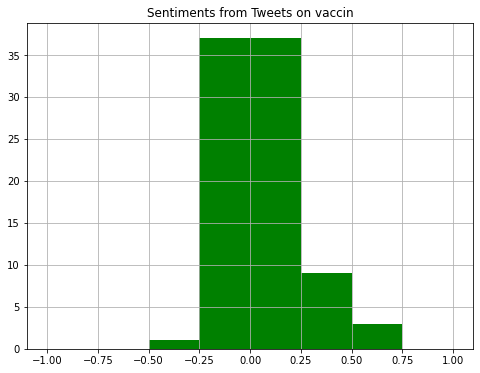

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")
plt.title("Sentiments from Tweets on " + "-".join(kw))
plt.show()